In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


## Image Resizing

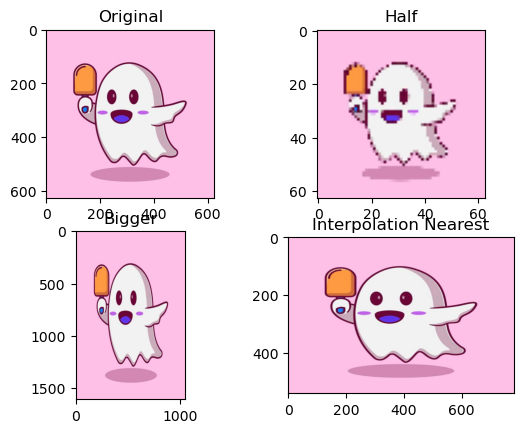

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"Freepik.jpeg", 1)
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (780, 540),interpolation = cv2.INTER_LINEAR)
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
plt.savefig('resized.png')
plt.show()

## Eroding an Image

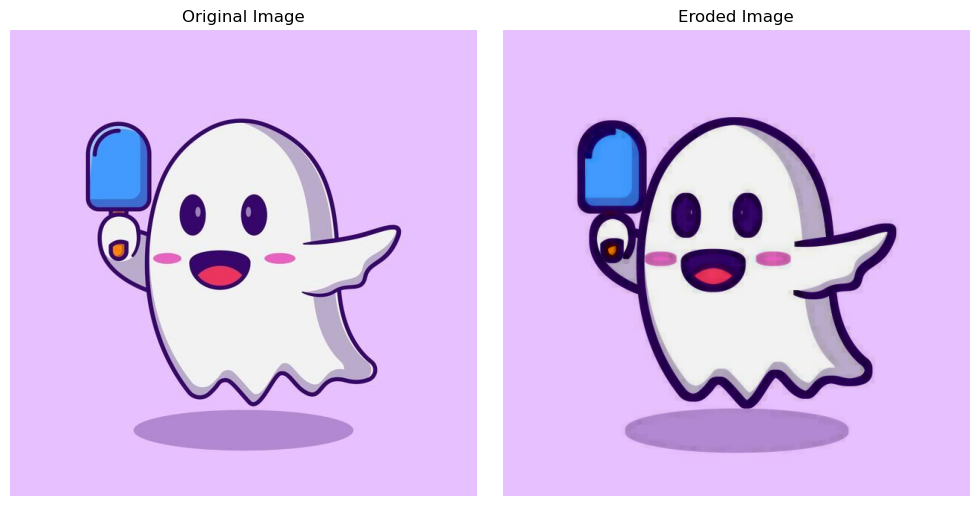

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = r'Freepik.jpeg'
image = cv2.imread(path)

if image is None:
    print("Error: Unable to load the image.")
else:
    window_name = 'Image'
    kernel = np.ones((6, 6), np.uint8)
    eroded_image = cv2.erode(image, kernel, cv2.BORDER_REFLECT)
    cv2.imshow('Original Image', image)
    cv2.imshow('Eroded Image', eroded_image)

    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    eroded_rgb = cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(eroded_rgb)
    plt.title('Eroded Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Blurring an Image

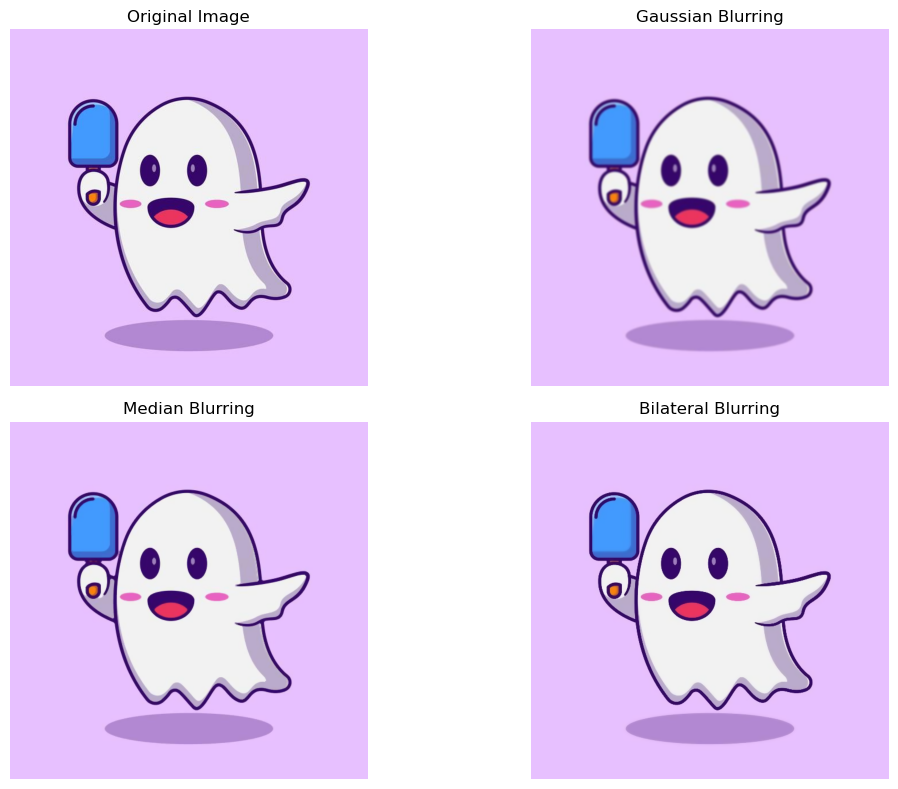

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Freepik.jpeg')
cv2.imshow('Original Image', image)
cv2.waitKey(0)

Gaussian = cv2.GaussianBlur(image, (7, 7), 0)
cv2.imshow('Gaussian Blurring', Gaussian)
cv2.waitKey(0)

median = cv2.medianBlur(image, 5)
cv2.imshow('Median Blurring', median)
cv2.waitKey(0)

bilateral = cv2.bilateralFilter(image, 9, 75, 75)
cv2.imshow('Bilateral Blurring', bilateral)
cv2.waitKey(0)

original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gaussian_rgb = cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB)
median_rgb = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
bilateral_rgb = cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)

titles = ['Original Image', 'Gaussian Blurring', 'Median Blurring', 'Bilateral Blurring']
images = [original_rgb, gaussian_rgb, median_rgb, bilateral_rgb]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
cv2.destroyAllWindows()

## Create Border around Images

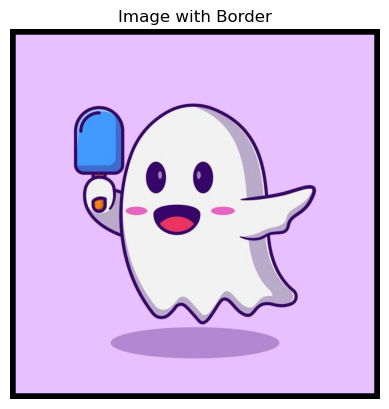

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = r'Freepik.jpeg'
image = cv2.imread(path)

if image is None:
    print("Error: Unable to load the image.")
else:
    window_name = 'Image'
    border_image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=0)
    border_rgb = cv2.cvtColor(border_image, cv2.COLOR_BGR2RGB)

    plt.imshow(border_rgb)
    plt.title('Image with Border')
    plt.axis('off')
    plt.show()

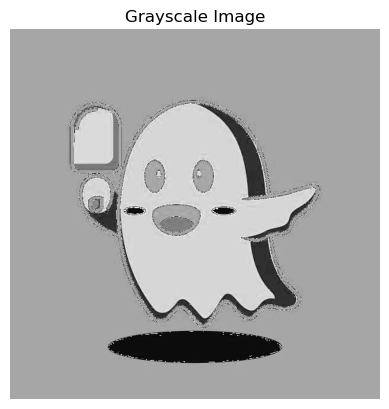

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Freepik.jpeg')

if img is None:
    print("Error: Unable to load the image.")
else:
    (rows, cols, channels) = img.shape
    gray_img = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
            gray_pixel = sum(img[i, j])
            gray_img[i, j] = gray_pixel
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
    cv2.imwrite('grayscale_image.png', gray_img)

## Scaling, Rotating, Shifting and Edge Detection

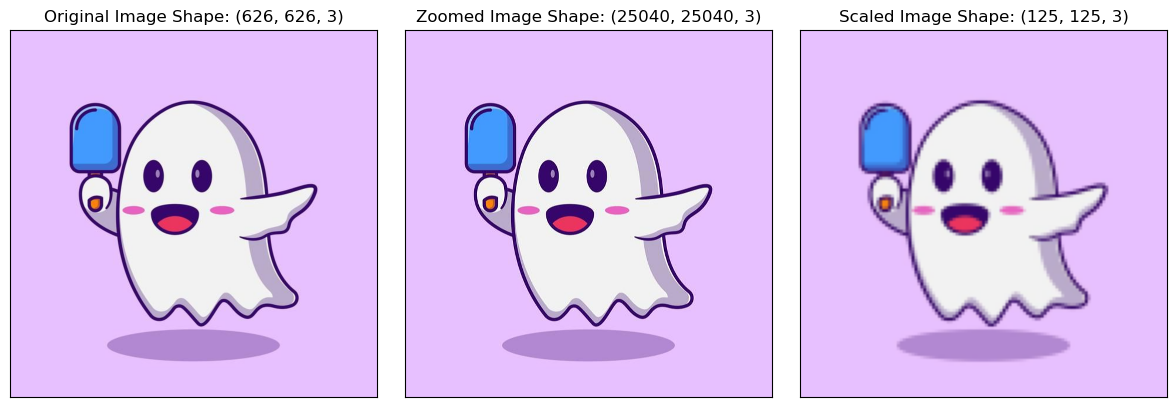

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Freepik.jpeg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
scale_factor_zoom = 40.0
scale_factor_scale = 1/5.0
height, width = image_rgb.shape[:2]

new_height_zoom = int(height * scale_factor_zoom)
new_width_zoom = int(width * scale_factor_zoom)

zoomed_image = cv2.resize(src=image_rgb,
                          dsize=(new_width_zoom, new_height_zoom),
                          interpolation=cv2.INTER_CUBIC)

new_height_scale = int(height * scale_factor_scale)
new_width_scale = int(width * scale_factor_scale)

scaled_image = cv2.resize(src=image_rgb,
                          dsize=(new_width_scale, new_height_scale),
                          interpolation=cv2.INTER_AREA)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape: ' + str(image_rgb.shape))

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape: ' + str(zoomed_image.shape))

axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape: ' + str(scaled_image.shape))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

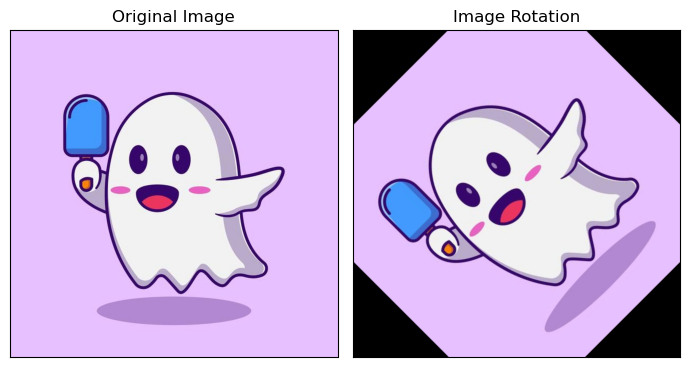

In [8]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('Freepik.jpeg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 45  # Modify the angle as needed
scale = 1

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

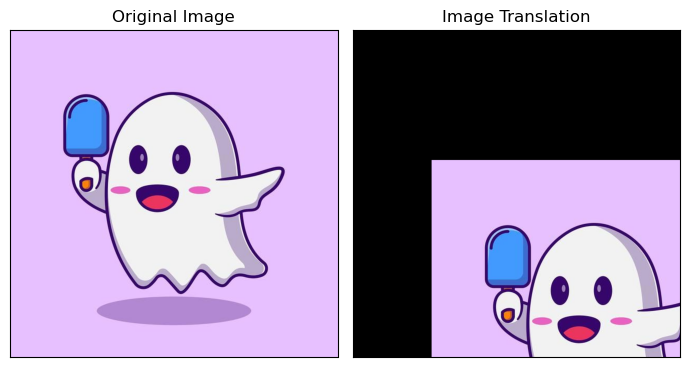

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Freepik.jpeg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width = image_rgb.shape[1]
height = image_rgb.shape[0]

tx = 150
ty = 250

translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(translated_image)
axs[1].set_title('Image Translation')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

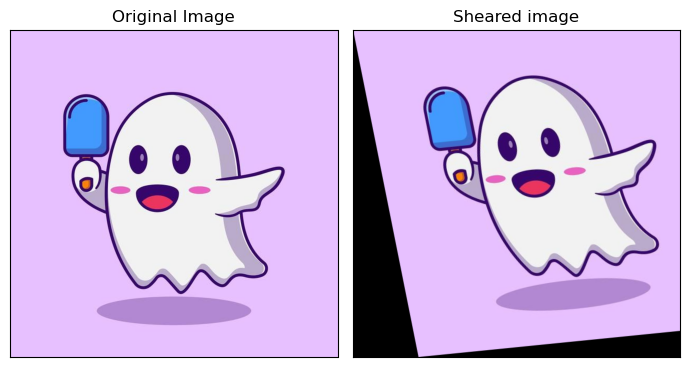

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Freepik.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

shearX = 0.2
shearY = -0.1

transformation_matrix = np.array([[1, shearX, 0],
                                [shearY, 1, 0]], dtype=np.float32)

sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Image Normalization

[[0.90551181 0.90551181 0.90551181 ... 0.90551181 0.90551181 0.90551181]
 [0.90551181 0.90551181 0.90551181 ... 0.90551181 0.90551181 0.90551181]
 [0.90551181 0.90551181 0.90551181 ... 0.90551181 0.90551181 0.90551181]
 ...
 [0.90551181 0.90551181 0.90551181 ... 0.90551181 0.90551181 0.90551181]
 [0.90551181 0.90551181 0.90551181 ... 0.90551181 0.90551181 0.90551181]
 [0.90551181 0.90551181 0.90551181 ... 0.90551181 0.90551181 0.90551181]]


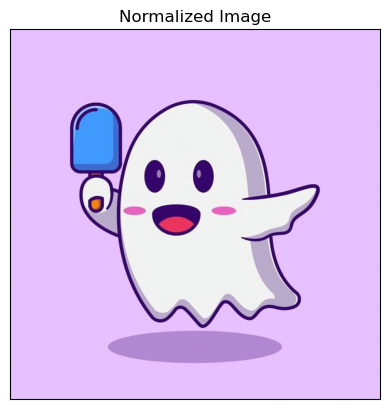

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Freepik.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(image_rgb)

min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)

normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
print(normalized_image[:,:,0])

plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()

## Edge detection of Image

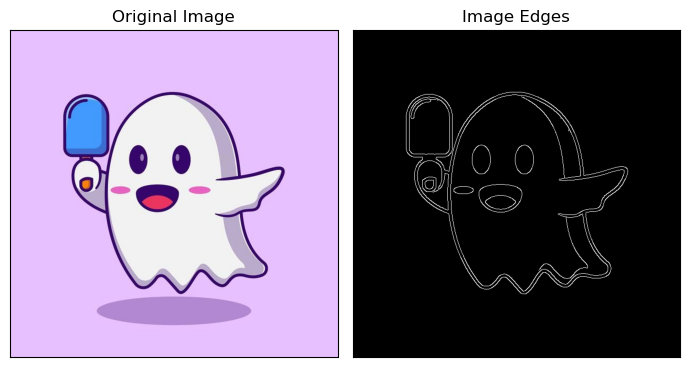

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Freepik.jpeg')

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(image=image_rgb, threshold1=100, threshold2=700)
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Image Edges')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig('image_edges.png')
plt.show()

## Morphological Image Processing

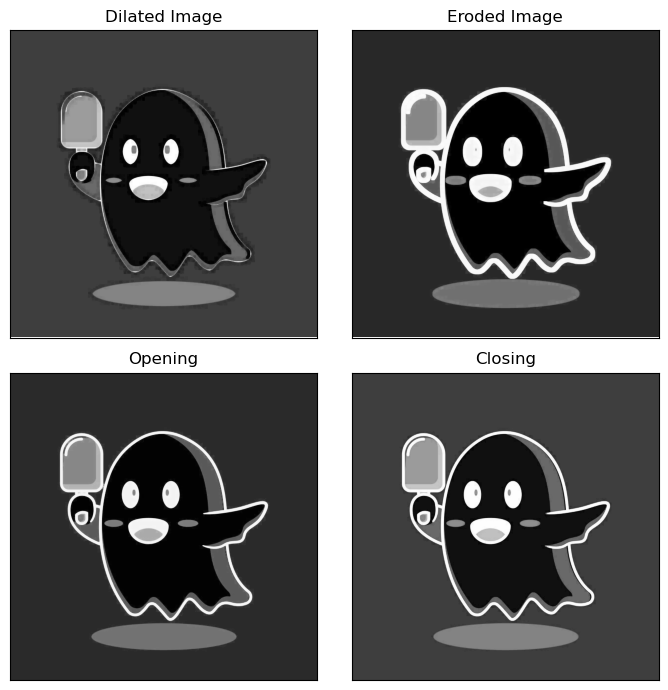

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Freepik.jpeg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3, 3), np.uint8)
dilated = cv2.dilate(image_gray, kernel, iterations=2)

eroded = cv2.erode(image_gray, kernel, iterations=2)

opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

axs[0,0].imshow(dilated, cmap='Greys')
axs[0,0].set_title('Dilated Image')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

axs[0,1].imshow(eroded, cmap='Greys')
axs[0,1].set_title('Eroded Image')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[1,0].imshow(opening, cmap='Greys')
axs[1,0].set_title('Opening')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

axs[1,1].imshow(closing, cmap='Greys')
axs[1,1].set_title('Closing')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

plt.tight_layout()
plt.savefig('morphological_image.png')
plt.show()

## Erosion and Dilation of images

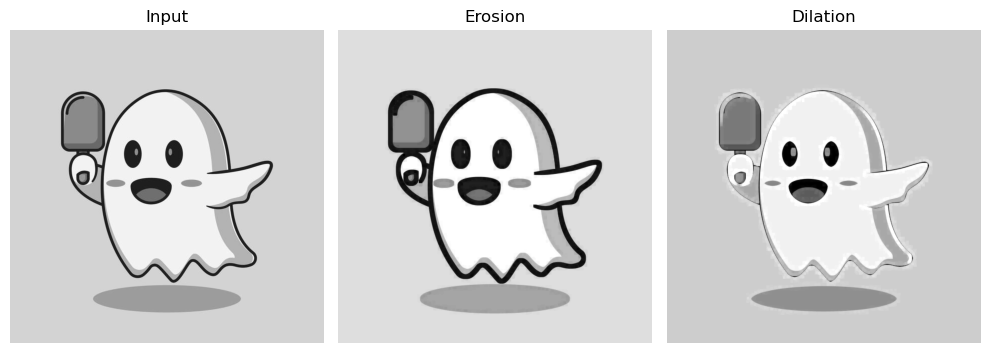

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Freepik.jpeg', 0)
kernel = np.ones((5, 5), np.uint8)

img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Input')
axs[0].axis('off')

axs[1].imshow(img_erosion, cmap='gray')
axs[1].set_title('Erosion')
axs[1].axis('off')

axs[2].imshow(img_dilation, cmap='gray')
axs[2].set_title('Dilation')
axs[2].axis('off')

plt.tight_layout()
plt.savefig('erosion_dilation.png')
plt.show()

## Analyze an image using Histogram

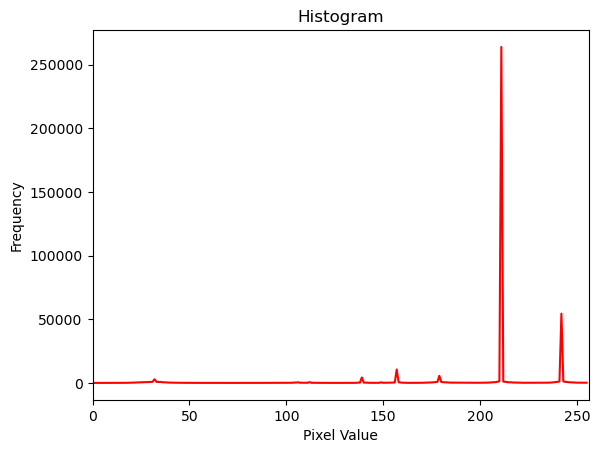

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('Freepik.jpeg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(hist, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.xlim([0, 256])
plt.savefig('histogram.png')
plt.show()

## Simple Thresholding

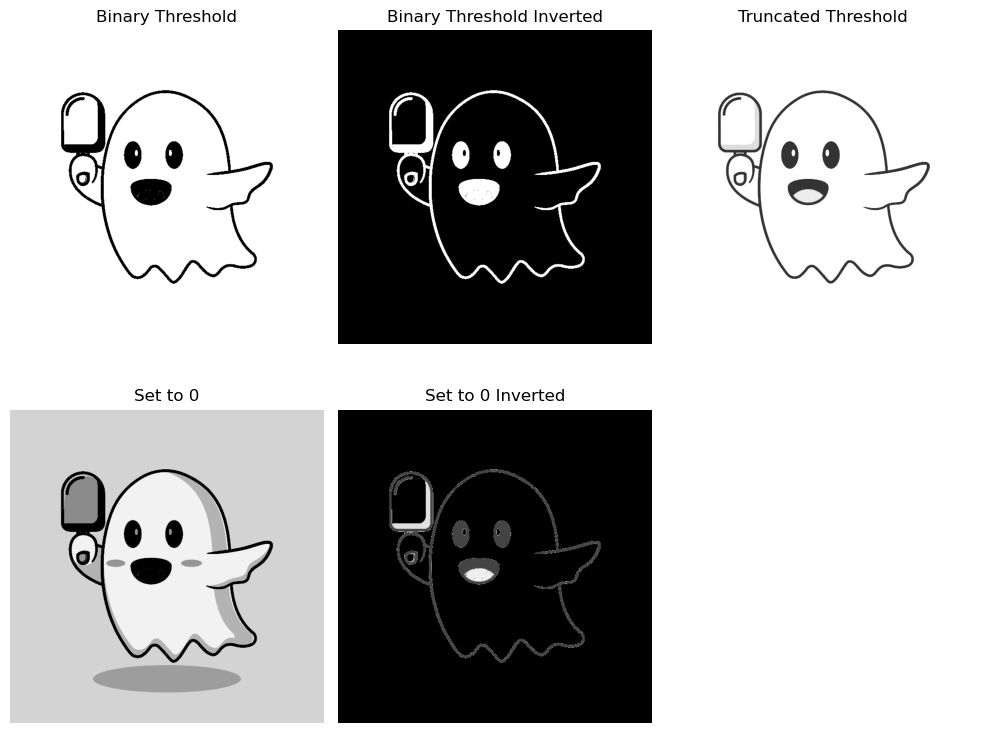

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
image1 = cv2.imread('Freepik.jpeg')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Apply different thresholding techniques
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

# Create a single figure to display all thresholded images
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Binary Threshold')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Binary Threshold Inverted')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(thresh3, cmap='gray')
plt.title('Truncated Threshold')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(thresh4, cmap='gray')
plt.title('Set to 0')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(thresh5, cmap='gray')
plt.title('Set to 0 Inverted')
plt.axis('off')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('combined_threshold_images.png')

# Display the figure
plt.show()


## Adaptive Thresholding

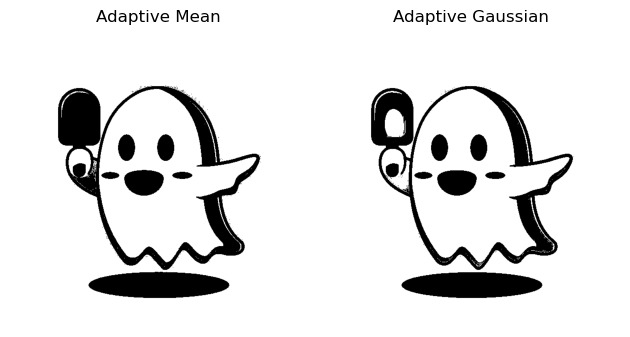

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('Freepik.jpeg')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 199, 5)

thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 199, 5)
plt.subplot(1, 2, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Adaptive Mean')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Adaptive Gaussian')
plt.axis('off')
plt.tight_layout()
plt.show()

cv2.destroyAllWindows()

## Otsu Thresholding

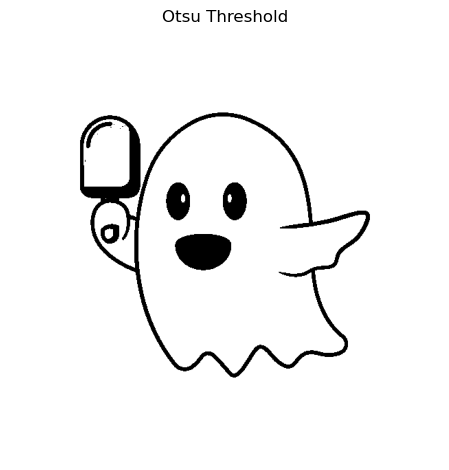

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread('Freepik.jpeg')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(thresh1, cmap='gray')
plt.title('Otsu Threshold')
plt.axis('off')
plt.tight_layout()
plt.show()

cv2.destroyAllWindows()

## Convert an image from one color space to another

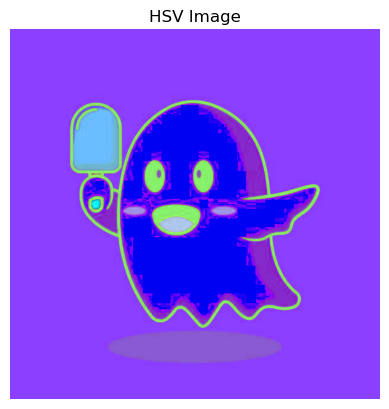

True

In [19]:
import cv2
import matplotlib.pyplot as plt
path = r'Freepik.jpeg'
src = cv2.imread(path)
image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(image, cmap='hsv')
plt.title('HSV Image')
plt.axis('off')
plt.show()

output_path = 'HSV_Image.png'
cv2.imwrite(output_path, image)

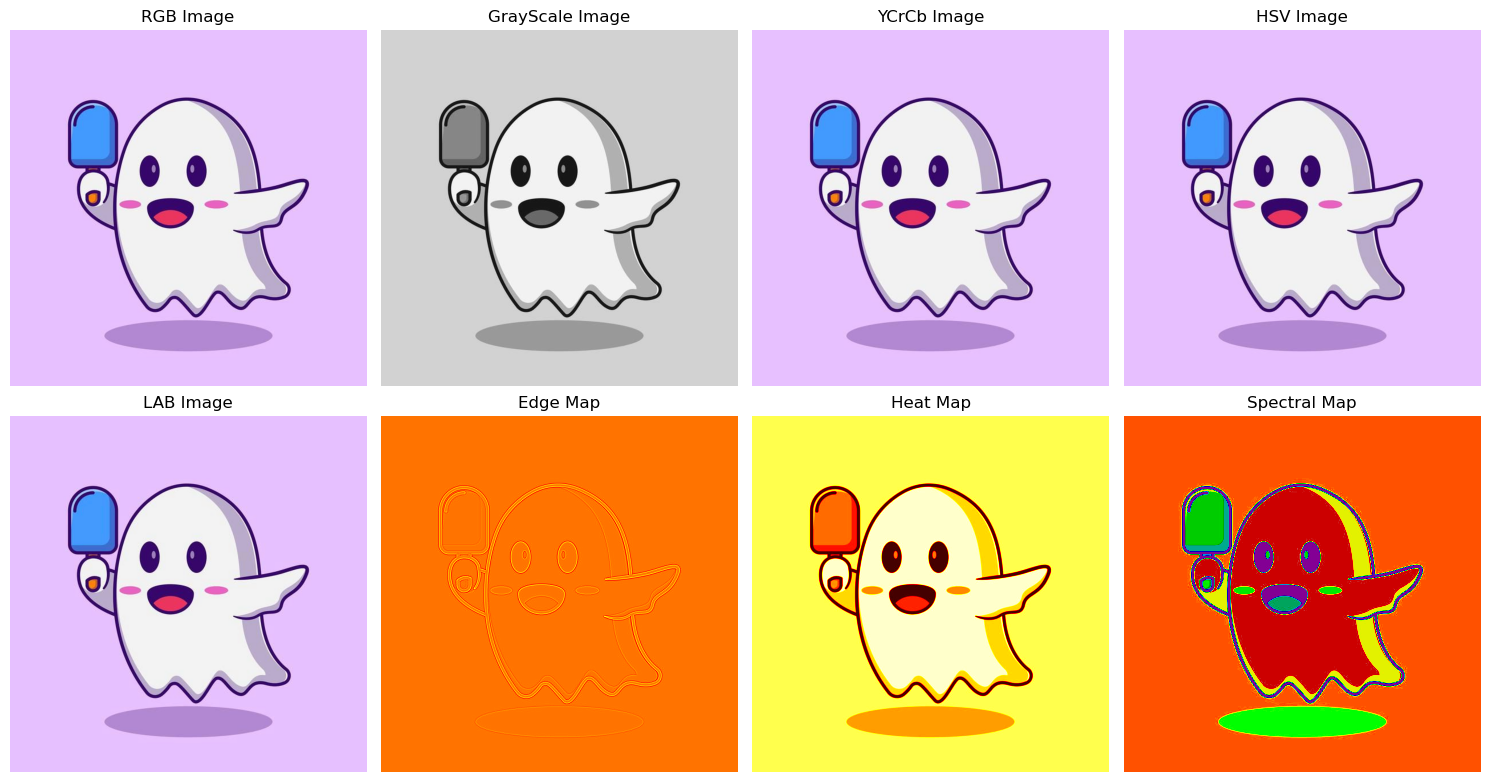

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('Freepik.jpeg')

# Convert the image to different color spaces
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_edge = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(img_edge, cv2.CV_64F)

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

# Plot the original RGB image
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('RGB Image')
axs[0, 0].axis('off')

# Plot the Grayscale image with colormap
axs[0, 1].imshow(img_gray, cmap='gray')
axs[0, 1].set_title('GrayScale Image')
axs[0, 1].axis('off')

# Plot the YCrCb image with colormap
axs[0, 2].imshow(cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2RGB))
axs[0, 2].set_title('YCrCb Image')
axs[0, 2].axis('off')

# Plot the HSV image with colormap
axs[0, 3].imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
axs[0, 3].set_title('HSV Image')
axs[0, 3].axis('off')

# Plot the LAB image with colormap
axs[1, 0].imshow(cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB))
axs[1, 0].set_title('LAB Image')
axs[1, 0].axis('off')

# Plot the Edge Map with colormap
axs[1, 1].imshow(laplacian, cmap='hot')
axs[1, 1].set_title('Edge Map')
axs[1, 1].axis('off')

# Plot the Heat Map with colormap
axs[1, 2].imshow(img_gray, cmap='hot')
axs[1, 2].set_title('Heat Map')
axs[1, 2].axis('off')

# Plot the Spectral Map with colormap
axs[1, 3].imshow(img_gray, cmap='nipy_spectral')
axs[1, 3].set_title('Spectral Map')
axs[1, 3].axis('off')

plt.tight_layout()
plt.savefig('subplots.png')
plt.show()


## FindingContours.png

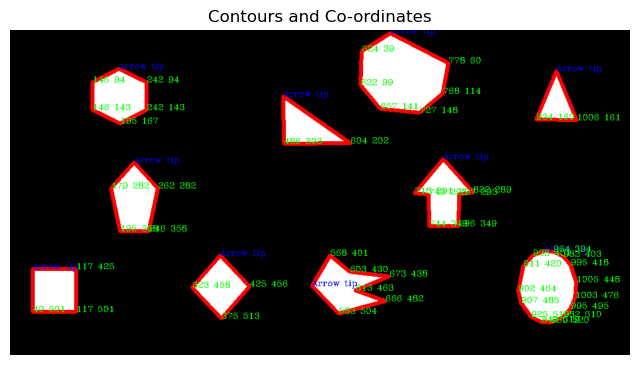

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

font = cv2.FONT_HERSHEY_COMPLEX
img2 = cv2.imread('FindingContours.png', cv2.IMREAD_COLOR)
img = cv2.imread('FindingContours.png', cv2.IMREAD_GRAYSCALE)

# Converting image to a binary image
# ( black and white only image).
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)

contours, _= cv2.findContours(threshold, cv2.RETR_TREE,
                            cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)
    n = approx.ravel()
    i = 0

    for j in n:
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]
            string = str(x) + " " + str(y)

            if(i == 0):
                cv2.putText(img2, "Arrow tip", (x, y),
                            font, 0.5, (255, 0, 0))
            else:
                cv2.putText(img2, string, (x, y),
                            font, 0.5, (0, 255, 0))
        i = i + 1
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title('Contours and Co-ordinates')
plt.axis('off')
plt.savefig('contours_and_coordinates.png')
plt.show()

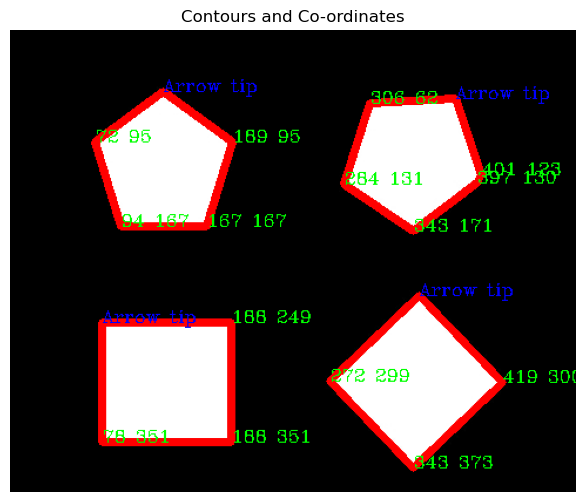

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

font = cv2.FONT_HERSHEY_COMPLEX
img2 = cv2.imread('test.jpg', cv2.IMREAD_COLOR)
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Converting image to a binary image
# ( black and white only image).
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY)

contours, _= cv2.findContours(threshold, cv2.RETR_TREE,
                            cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True)
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)
    n = approx.ravel()
    i = 0

    for j in n:
        if(i % 2 == 0):
            x = n[i]
            y = n[i + 1]
            string = str(x) + " " + str(y)

            if(i == 0):
                cv2.putText(img2, "Arrow tip", (x, y),
                            font, 0.5, (255, 0, 0))
            else:
                cv2.putText(img2, string, (x, y),
                            font, 0.5, (0, 255, 0))
        i = i + 1
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title('Contours and Co-ordinates')
plt.axis('off')
plt.savefig('test_output.jpg')
plt.show()

## Bilateral Filtering

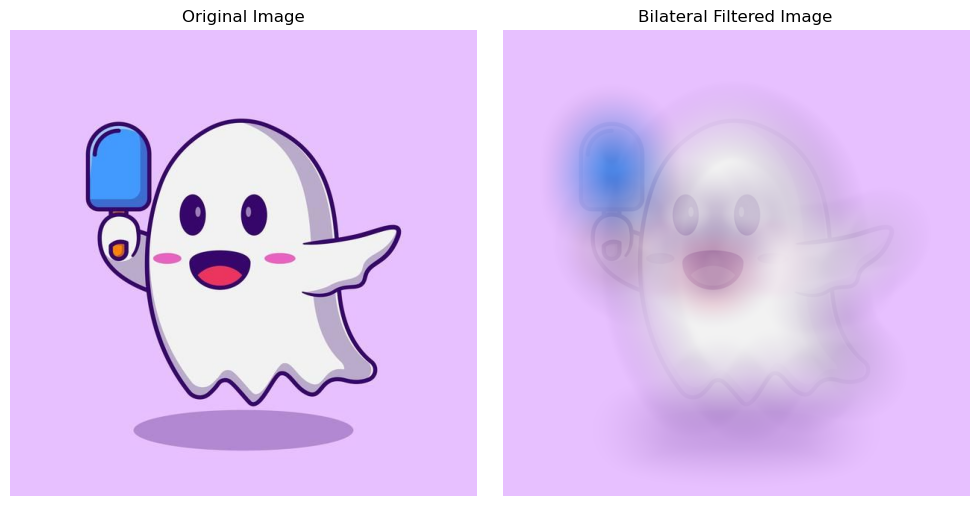

In [23]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('Freepik.jpeg')
bilateral = cv2.bilateralFilter(img, 105, 750, 750)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
axs[1].set_title('Bilateral Filtered Image')
axs[1].axis('off')

cv2.imwrite('bilateral.jpg', bilateral)
plt.tight_layout()
plt.show()

## Foreground Extraction in an Image using Grabcut Algorithm

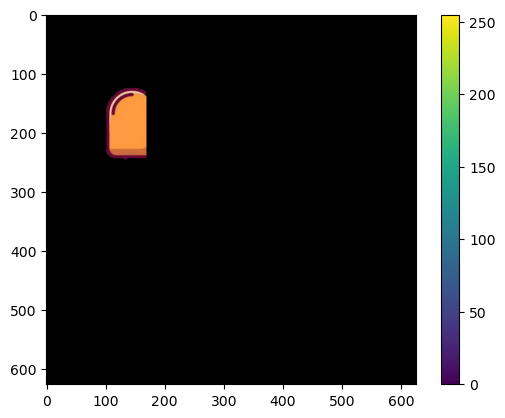

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('Freepik.jpeg')
mask = np.zeros(image.shape[:2], np.uint8)

backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
rectangle = (20, 100, 150, 150)

cv2.grabCut(image, mask, rectangle,backgroundModel, foregroundModel,3, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

image = image * mask2[:, :, np.newaxis]

plt.imshow(image)
plt.colorbar()
plt.show()